In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [5]:

# Parameters
eta = 1e-2   # Magnetic diffusivity
L = 1.0      # Length of the domain
T = 5.0      # Total time
Nx = 200   # Number of spatial grid points
Nt = 1000    # Number of time steps

def initial_condition(x):
    return 50000 * np.sin(np.pi *(x+1)/2)
def boundary_conditions(B):
    B[0] = 0
    B[-1] = 0
def crank_nicolson_magnetic_diffusion(x,t,eta, Nx, Nt, L, T,initial,boundary):
    dx = L / Nx
    dt = T / Nt
    r = eta * dt / (2 * dx**2)
    B = np.zeros((Nx+1, Nt+1))
    B[:, 0] = initial(x)
    A = np.diag((1 + 2 * r) * np.ones(Nx-1)) + np.diag(-r * np.ones(Nx-2), 1) + np.diag(-r * np.ones(Nx-2), -1)
    B_matrix = np.diag((1 - 2 * r) * np.ones(Nx-1)) + np.diag(r * np.ones(Nx-2), 1) + np.diag(r * np.ones(Nx-2), -1)
    for j in range(Nt):
        boundary(B[:, j])
        B[1:-1, j+1] = np.linalg.solve(A, np.dot(B_matrix, B[1:-1, j]))
    return B



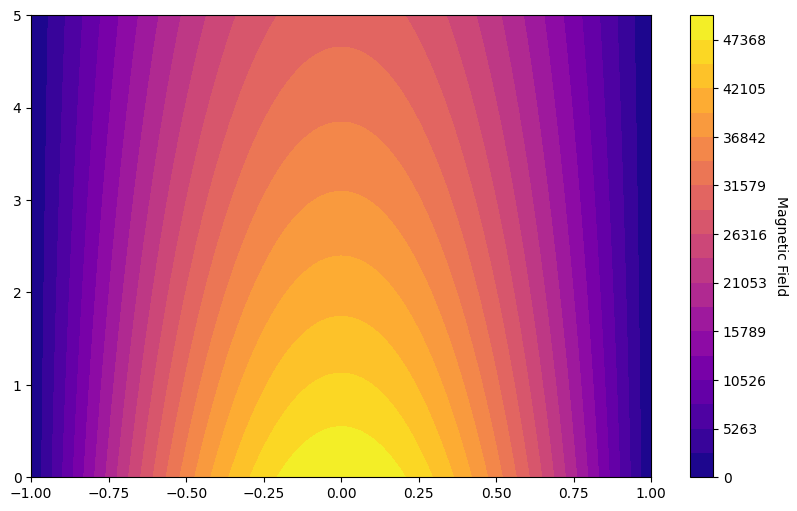

In [6]:
def calculate_B_i(eta,Nx,Nt,L,T,method=crank_nicolson_magnetic_diffusion,initial=initial_condition,boundary=boundary_conditions):
    # Grid
    x = np.linspace(-1, 1, Nx+1)  # Normalized spatial grid
    t = np.linspace(0, T, Nt+1)    # Time grid
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    # Solve magnetic field diffusion equation using Crank-Nicolson method
    magnetic_field = method(x,t,eta, Nx, Nt, L, T,initial,boundary)

    # Contour 
    plt.figure(figsize=(10, 6))
    levels = np.linspace(np.min(magnetic_field), np.max(magnetic_field), 20)
    plt.contourf(x, t, magnetic_field.T, levels=levels, cmap='plasma')
    cbar = plt.colorbar(label='Magnetic Field')
    cbar.set_label('Magnetic Field', rotation=270, labelpad=15)
    plt.show()
    return magnetic_field
B_z=calculate_B_i(eta,Nx,Nt,L,T)

Gamma from fit: -0.09869401667429793
Gamma from thrids: -0.09869401667429788


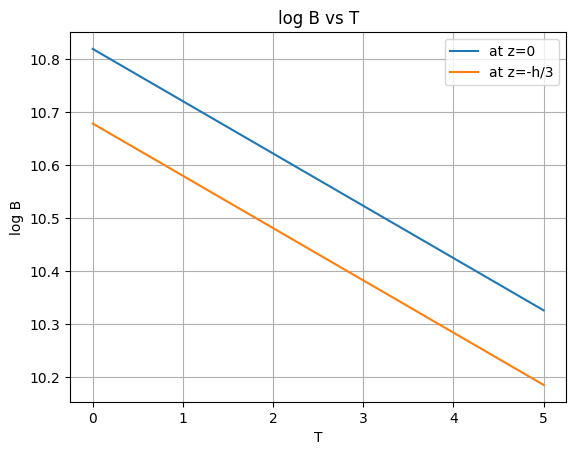

In [7]:

B=B_z
middle_index = len(B) // 2
thirds=len(B)//3
B_middle = B[middle_index, :]
B_thirds = B[thirds, :]
def exponential_func(t, B0, gamma):
    return B0 * np.exp(gamma * t)
t_fit = np.linspace(0, T, Nt+1)  
popt, pcov = curve_fit(exponential_func, t_fit, B_middle)
popt1, pcov1 = curve_fit(exponential_func, t_fit, B_thirds)
gamma_optimal = popt[1]#popt[B_0,gamma]
print("Gamma from fit:", gamma_optimal)
print("Gamma from thrids:", popt1[1])
log_B = np.log(B_middle)
log_B1 = np.log(B_thirds)
plt.plot(t_fit,log_B,label="at z=0")
plt.plot(t_fit,log_B1,label="at z=-h/3")

plt.ylabel("log B")
plt.xlabel("T")
plt.title("log B vs T")
plt.grid()
plt.legend()
plt.show()

In [8]:
def initial_condition(x):
    return 50000 * np.sin(np.pi *(x+1)/2)

**Br and Bphi**

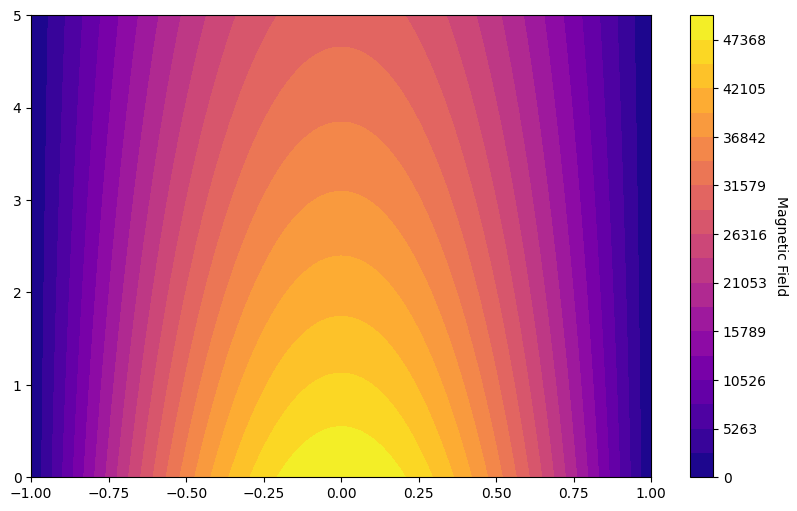

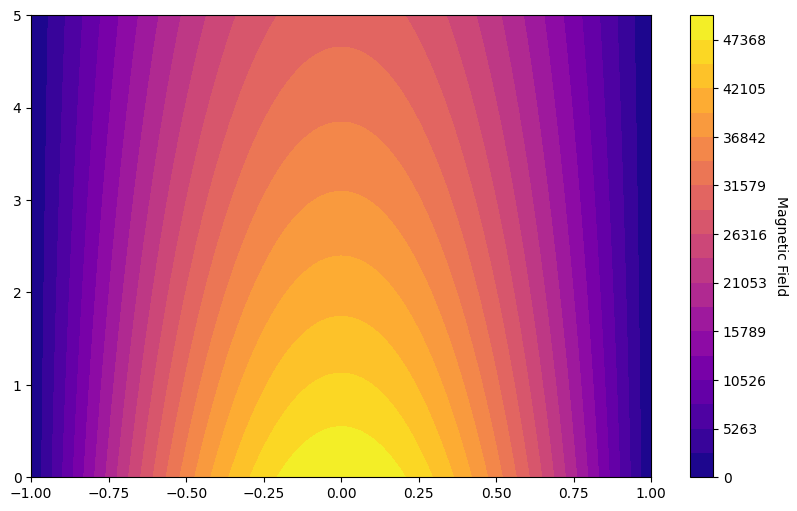

In [9]:
B_r=calculate_B_i(eta,Nx,Nt,L,T)
B_phi=calculate_B_i(eta,Nx,Nt,L,T)

In [10]:
def get_mean_field_B(B_i):
    meanB_t=[]
    for i in range(0,len(B_i)):
        meanB_t.append(np.mean(B[:,i]))
    return meanB_t
MeanBR=get_mean_field_B(B_r)
MeanBPhi=get_mean_field_B(B_phi)
print("MeanBR:",MeanBR)
print("MeanBPhi:",MeanBPhi)

MeanBR: [31671.974245988098, 31656.348929846503, 31640.731322428794, 31625.121419931886, 31609.51921855458, 31593.92471449753, 31578.337903963282, 31562.758783156245, 31547.187348282707, 31531.623595550824, 31516.067521170626, 31500.519121354006, 31484.97839231474, 31469.44533026845, 31453.91993143265, 31438.402192026704, 31422.89210827184, 31407.38967639116, 31391.894892609627, 31376.407753154057, 31360.928254253133, 31345.456392137414, 31329.99216303929, 31314.53556319303, 31299.08658883476, 31283.645236202447, 31268.21150153593, 31252.785381076905, 31237.36687106891, 31221.955967757338, 31206.55266738944, 31191.156966214323, 31175.768860482927, 31160.388346448053, 31145.015420364365, 31129.65007848834, 31114.292317078336, 31098.94213239454, 31083.599520698986, 31068.264478255544, 31052.937001329945, 31037.61708618976, 31022.304729104377, 31006.999926345048, 30991.702674184864, 30976.412968898752, 30961.130806763467, 30945.856184057615, 30930.589097061616, 30915.329542057763, 30900.0

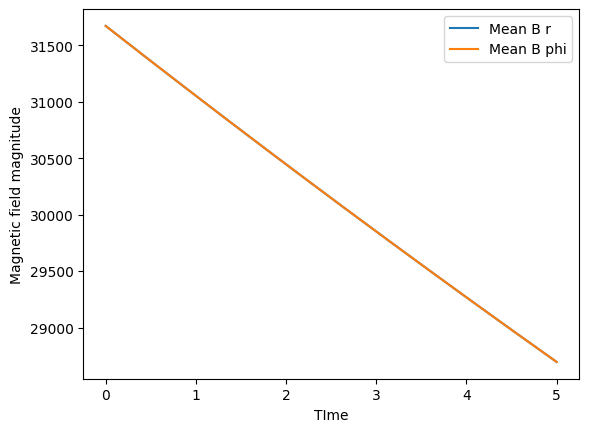

In [23]:
t_fit = np.linspace(0, T, len(MeanBPhi))  
plt.plot(t_fit,MeanBR,label="Mean B r")
plt.plot(t_fit,MeanBPhi,label="Mean B phi")
plt.ylabel("Magnetic field magnitude")
plt.xlabel("Time")

plt.title("Magnetic field magnitude Vs time")
plt.legend()
plt.show()

In [19]:
def get_pitch(MeanBR,MeanBPhi):
    pitchvalues=[]
    for i in range(0,len(MeanBR)):
        pitchvalues.append(math.atan(MeanBR[i]/MeanBPhi[i]))
    return pitchvalues
PitchVTime=get_pitch(MeanBR,MeanBPhi)
atan_pi_x = atan_value / math.pi

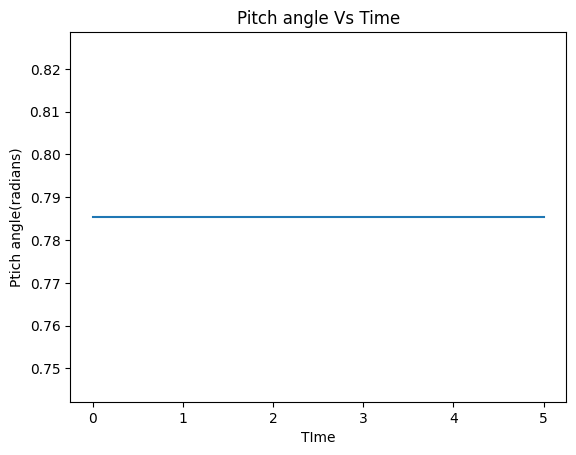

In [26]:
plt.plot(t_fit,PitchVTime)
plt.ylabel("Ptich angle(radians)")
plt.xlabel("TIme")
plt.title("Pitch angle Vs Time")
plt.show()